# 1. Importing Data


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [12]:
xls = pd.ExcelFile('Employee_data.xlsx')
df = pd.read_excel(xls, 'employee')
df_dict = pd.read_excel(xls, 'data_dictionary')

In [13]:
df.head()

id_karyawan         departemen     wilayah        pendidikan jenis_kelamin  \
0        80589  Sales & Marketing   wilayah_7  Master's & above             f   
1        80292         Operations  wilayah_22        Bachelor's             m   
2        22664  Sales & Marketing  wilayah_19        Bachelor's             m   
3        17693  Sales & Marketing  wilayah_23        Bachelor's             m   
4        64096         Technology  wilayah_26        Bachelor's             m   

  rekrutmen  jumlah_training  umur  rating_tahun_lalu  masa_kerja  KPI_>80%  \
0  sourcing                1    35                5.0           8         1   
1     other                1    30                5.0           4         0   
2  sourcing                1    34                3.0           7         0   
3     other                2    39                1.0          10         0   
4     other                1    45                3.0           2         0   

   penghargaan  rata_rata_skor_training  dipromosikan  
0            0                       49             0  
1            0                       60             0  
2            0                       50             0  
3            0                       50             0  
4            0                       73             0

In [14]:
df_dict

Unnamed: 0               Unnamed: 1  \
0          NaN                  atribut   
1          NaN                      NaN   
2          NaN              id_karyawan   
3          NaN               departemen   
4          NaN                  wilayah   
5          NaN               pendidikan   
6          NaN            jenis_kelamin   
7          NaN                rekrutmen   
8          NaN          jumlah_training   
9          NaN                     umur   
10         NaN        rating_tahun_lalu   
11         NaN               masa_kerja   
12         NaN                 KPI_>80%   
13         NaN              penghargaan   
14         NaN  rata_rata_skor_training   
15         NaN             dipromosikan   

                                           Unnamed: 2  
0                                           deskripsi  
1                                                 NaN  
2                                         id karyawan  
3   departemen tempat karyawan bekerja (contoh: Sa...  
4                             wilayah kerja karyawan   
5                        tingkat pendidikan karyawan   
6                             jenis kelamin karyawan   
7                                    jalur rekrutmen   
8   jumlah pelatihan yang diselesaikan oleh karyaw...  
9                                      umur karyawan   
10                        rating karyawan tahun lalu   
11                 masa bekerja karyawan dalam tahun   
12  key performance index apakah lebih besar dari ...  
13  jika memenangkan penghargaan sebagai karyawan ...  
14                           skor training rata-rata   
15                target (recommended for promotion)

In [15]:
df.shape

(54808, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               52399 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  object 
 6   jumlah_training          54808 non-null  int64  
 7   umur                     54808 non-null  int64  
 8   rating_tahun_lalu        50684 non-null  float64
 9   masa_kerja               54808 non-null  int64  
 10  KPI_>80%                 54808 non-null  int64  
 11  penghargaan              54808 non-null  int64  
 12  rata_rata_skor_training  54808 non-null  int64  
 13  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(8

## Langkah yang mau dilakukan untuk Cleaning dan EDA:

1. Clean missing value. Cari imputasi mau pake apa, mean atau apa

2. Coba cek distribusi masing-masing features yang continu apakah ada outlier atau engga

3. Coba cek korelasi features yang continu dan coba visualisasiin kalau ada yang linear korelasi atau pake matrix scatter plot

4. Pertanyaan untuk EDA:

  a. Apakah jumlah training, umur, ratin tahun lalu, dan masa kerja mempengaruhi key performance index atau dipromosikan?
  
  b. Apakah pendidikan dan jalur rekrutment mempengaruhi karyawan dipromosikan?
  
  c. departemen apa saja yang paling banyak dipromosikan?
   

# 2. Handling Missing Value

###### Kita cek apakah ada missing value pada data

In [17]:
df.isnull().any()

id_karyawan                False
departemen                 False
wilayah                    False
pendidikan                  True
jenis_kelamin              False
rekrutmen                  False
jumlah_training            False
umur                       False
rating_tahun_lalu           True
masa_kerja                 False
KPI_>80%                   False
penghargaan                False
rata_rata_skor_training    False
dipromosikan               False
dtype: bool

###### Terdapat dua feature yang memiliki missing value yaitu pendidikan dan rating_tahun_lalu, kita cek satu persatu

In [18]:
print('Jumlah missing value data kolom pendidikan :',df['pendidikan'].isnull().sum())
print('Persen missing value data kolom pendidikan :',(df['pendidikan'].isnull().sum())*100/df.shape[0],'%')

Jumlah missing value data kolom pendidikan : 2409
Persen missing value data kolom pendidikan : 4.395343745438622 %


In [19]:
print('Jumlah missing value data kolom rating_tahun_lalu :',df['rating_tahun_lalu'].isnull().sum())
print('Persen missing value data kolom rating_tahun_lalu :',(df['rating_tahun_lalu'].isnull().sum())*100/df.shape[0],'%')

Jumlah missing value data kolom rating_tahun_lalu : 4124
Persen missing value data kolom rating_tahun_lalu : 7.524448985549554 %


###### Karena missing value yang dimiliki tergolong sedikit (< 10%), maka kita tidak perlu membuangnya. Kita coba lakukan imputation dengan nilai rata-rata atau modus setiap kolom yang memiliki missing value

In [20]:
# Isi missing value pada kolom pendidikan dengan value yang paling banyak muncul, yaitu Bachelor's
df['pendidikan']=df['pendidikan'].fillna("Bachelor's")
df['pendidikan'].count()

54808

In [21]:
# isi missing value pada kolom pendidikan dengan value rata-rata atau modusnya
df['rating_tahun_lalu']=df['rating_tahun_lalu'].fillna(3.0)
df['rating_tahun_lalu'].count()

54808

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               54808 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  object 
 6   jumlah_training          54808 non-null  int64  
 7   umur                     54808 non-null  int64  
 8   rating_tahun_lalu        54808 non-null  float64
 9   masa_kerja               54808 non-null  int64  
 10  KPI_>80%                 54808 non-null  int64  
 11  penghargaan              54808 non-null  int64  
 12  rata_rata_skor_training  54808 non-null  int64  
 13  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(8

#### Masalah missing value sudah teratasi

# 3. Checking Outlier

###### Kita cek terlebih dahulu distribusi masing-masing features

In [23]:
df.describe()

id_karyawan  jumlah_training          umur  rating_tahun_lalu  \
count  54808.000000     54808.000000  54808.000000       54808.000000   
mean   54346.830627         1.253011     34.803915           3.304481   
std    22586.581449         0.609264      7.660169           1.214770   
min    15152.000000         1.000000     20.000000           1.000000   
25%    34820.750000         1.000000     29.000000           3.000000   
50%    54376.500000         1.000000     33.000000           3.000000   
75%    73881.500000         1.000000     39.000000           4.000000   
max    93449.000000        10.000000     60.000000           5.000000   

         masa_kerja      KPI_>80%   penghargaan  rata_rata_skor_training  \
count  54808.000000  54808.000000  54808.000000             54808.000000   
mean       5.865512      0.351974      0.023172                63.386750   
std        4.265094      0.477590      0.150450                13.371559   
min        1.000000      0.000000      0.000000                39.000000   
25%        3.000000      0.000000      0.000000                51.000000   
50%        5.000000      0.000000      0.000000                60.000000   
75%        7.000000      1.000000      0.000000                76.000000   
max       37.000000      1.000000      1.000000                99.000000   

       dipromosikan  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

###### Terlihat kolom jumlah_training mempunyai nilai maksimal yang jauh dari rata-ratanya. Ini sedikit mencurigakan dan akan dicek lebih lanjut. Kedua, kolom masa_kerja mempunyai nilai maksimal yang sangat jauh dari rata-rata dan  persentil ke 75% nya, yaitu 37. Sepertinya sangat jarang orang bekerja selama 37 tahun di perusahaan. Ini akan dicek lebih lanjut.

## 3.1. Outlier fitur jumlah_training 

In [24]:
df[df['jumlah_training']==10]

id_karyawan         departemen     wilayah        pendidikan  \
6207         79691        Procurement   wilayah_2  Master's & above   
30936        59121        Procurement  wilayah_13        Bachelor's   
32870        15791        Procurement   wilayah_2        Bachelor's   
34496        64559        Procurement   wilayah_2        Bachelor's   
44897        27478  Sales & Marketing   wilayah_2  Master's & above   

      jenis_kelamin rekrutmen  jumlah_training  umur  rating_tahun_lalu  \
6207              m     other               10    55                3.0   
30936             m  sourcing               10    28                3.0   
32870             m  sourcing               10    36                1.0   
34496             m     other               10    60                3.0   
44897             f     other               10    42                3.0   

       masa_kerja  KPI_>80%  penghargaan  rata_rata_skor_training  \
6207           12         0            0                       70   
30936           2         0            0                       71   
32870          10         0            0                       66   
34496           3         0            0                       69   
44897          13         0            0                       49   

       dipromosikan  
6207              0  
30936             0  
32870             0  
34496             0  
44897             0

In [25]:
df['jumlah_training'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: jumlah_training, dtype: int64

Sepertinya nilai 10 pada kolom jumlah_training masih masuk akal. Ini tidak jadi dibuang. Lalu selanjutnya kolom masa_kerja akan dicek pada kemungkinan outliernya.

## 3.2. Outlier fitur masa_kerja

In [26]:
df[df['masa_kerja']==37]

id_karyawan         departemen    wilayah  pendidikan jenis_kelamin  \
31071        66727  Sales & Marketing  wilayah_2  Bachelor's             m   

      rekrutmen  jumlah_training  umur  rating_tahun_lalu  masa_kerja  \
31071  sourcing                2    60                5.0          37   

       KPI_>80%  penghargaan  rata_rata_skor_training  dipromosikan  
31071         0            0                       48             0

Kita cek dengan rumus IQR

In [27]:
Q12 = df['masa_kerja'].quantile(0.25)
Q32 = df['masa_kerja'].quantile(0.75)
IQR2 = Q32-Q12

In [28]:
df[df['masa_kerja']>(Q32+(1.5*IQR2))]

id_karyawan         departemen     wilayah        pendidikan  \
13           53552         Technology  wilayah_29  Master's & above   
42           38711                 HR   wilayah_2        Bachelor's   
60           32824  Sales & Marketing   wilayah_4  Master's & above   
74           92728  Sales & Marketing   wilayah_7        Bachelor's   
99           66407            Finance   wilayah_2  Master's & above   
...            ...                ...         ...               ...   
54691        19361          Analytics   wilayah_2  Master's & above   
54695        56499         Operations   wilayah_2        Bachelor's   
54697        25787  Sales & Marketing   wilayah_2        Bachelor's   
54754        60848         Technology  wilayah_26        Bachelor's   
54803        18181         Technology  wilayah_14        Bachelor's   

      jenis_kelamin rekrutmen  jumlah_training  umur  rating_tahun_lalu  \
13                m     other                2    39                3.0   
42                m  sourcing                1    59                4.0   
60                m     other                1    50                4.0   
74                m     other                1    50                3.0   
99                m     other                1    60                5.0   
...             ...       ...              ...   ...                ...   
54691             m  sourcing                1    47                5.0   
54695             f     other                2    52                5.0   
54697             m  sourcing                1    47                5.0   
54754             f     other                1    42                3.0   
54803             m  sourcing                1    48                3.0   

       masa_kerja  KPI_>80%  penghargaan  rata_rata_skor_training  \
13             16         0            0                       80   
42             26         1            0                       52   
60             17         1            0                       47   
74             14         0            0                       52   
99             17         0            0                       59   
...           ...       ...          ...                      ...   
54691          19         0            0                       86   
54695          18         1            0                       56   
54697          15         0            0                       50   
54754          14         0            0                       79   
54803          17         0            0                       78   

       dipromosikan  
13                0  
42                0  
60                1  
74                0  
99                0  
...             ...  
54691             0  
54695             1  
54697             0  
54754             0  
54803             0  

[3489 rows x 14 columns]

Terlihat bahwa data dengan masa_kerja di atas 14 thn sudah termasuk outlier berdasarkan rumus IQR. Namun di sini saya membuang hanya data dengan nilai 20 tahun ke atas

In [29]:
df['masa_kerja'].value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: masa_kerja, dtype: int64

In [30]:
df= df[~((df['masa_kerja']>21))]
df.shape

(54368, 14)

###### Dengan demikian masalah outlier dirasa cukup tertangani

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54368 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54368 non-null  int64  
 1   departemen               54368 non-null  object 
 2   wilayah                  54368 non-null  object 
 3   pendidikan               54368 non-null  object 
 4   jenis_kelamin            54368 non-null  object 
 5   rekrutmen                54368 non-null  object 
 6   jumlah_training          54368 non-null  int64  
 7   umur                     54368 non-null  int64  
 8   rating_tahun_lalu        54368 non-null  float64
 9   masa_kerja               54368 non-null  int64  
 10  KPI_>80%                 54368 non-null  int64  
 11  penghargaan              54368 non-null  int64  
 12  rata_rata_skor_training  54368 non-null  int64  
 13  dipromosikan             54368 non-null  int64  
dtypes: float64(1), int64(8

# 4. Exploratory Data Analysis (EDA)

## 4.1. Basic Visualization

#### Akan diperlihatkan visualisasi masing-masing fitur data karyawan serta hubungan mereka dengan target utama (karyawan dipromosikan)

### 4.1.1. Fitur Departemen

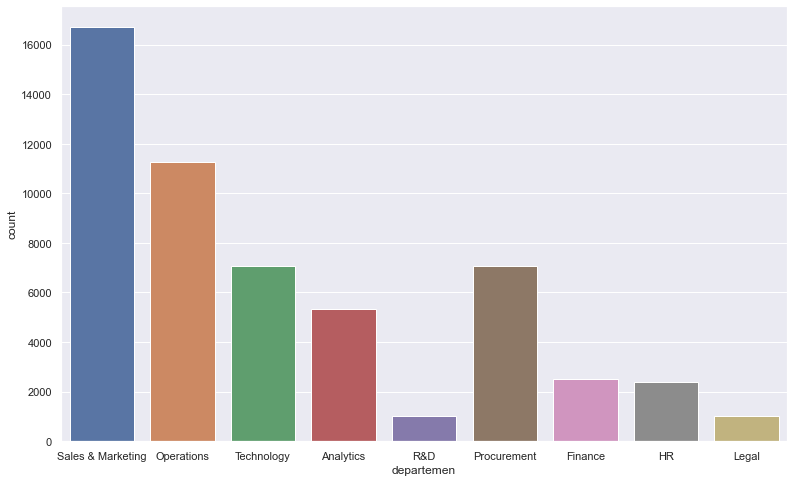

In [32]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='departemen',data=df)

#### Terlihat dari grafik di atas bahwa fitur Sales & marketing, Operations, dan Procurement mendominasi data pada fitur departemen ini.

<Figure size 1440x576 with 0 Axes>

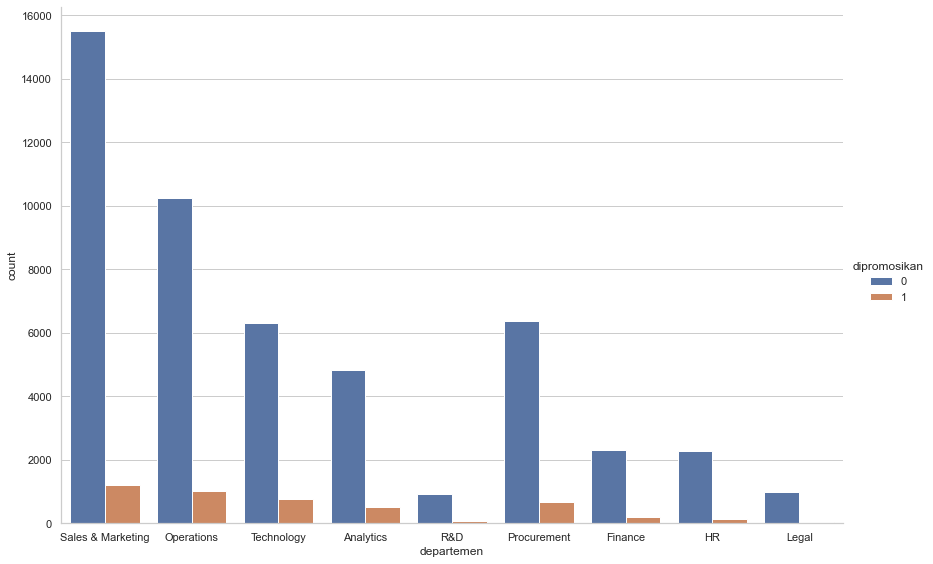

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='departemen',hue='dipromosikan',data=df,kind="count",height=8, aspect=1.5)

#### Dari grafik di atas dapat dilihat bahwa karyawan dari departemen Sales & marketing, operations, dan Technology yang paling banyak dipromosikan

### 4.1.2. Fitur Pendidikan

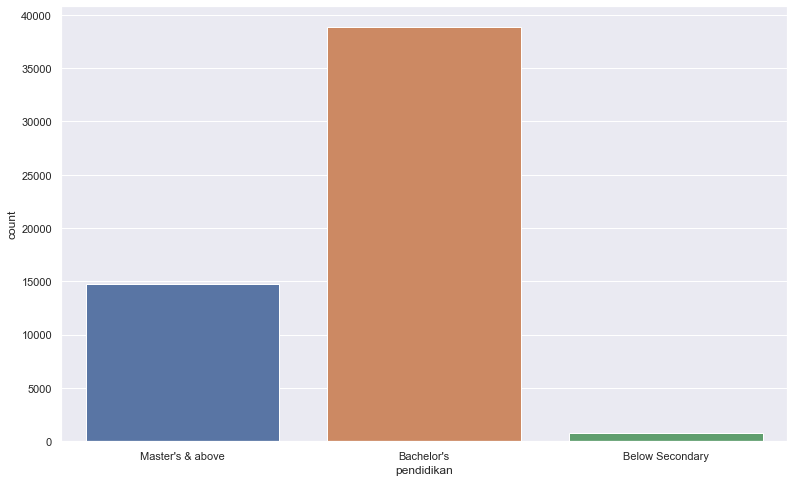

In [34]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='pendidikan',data=df)

#### Terlihat bahwa karyawan dengan latar belakang sarjana paling banyak atau mendominasi data pada kolom pendidikan

<Figure size 1440x576 with 0 Axes>

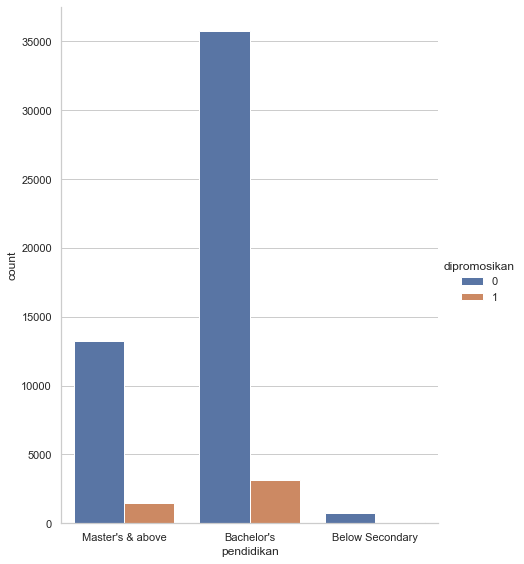

In [35]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='pendidikan',hue='dipromosikan',data=df,kind="count",height=8, aspect=0.8)

#### Terlihat juga karyawan berlatar belakang pendidikan sarjana dan master paling banyak dipromosikan

### 4.1.3. Fitur Jenis Kelamin

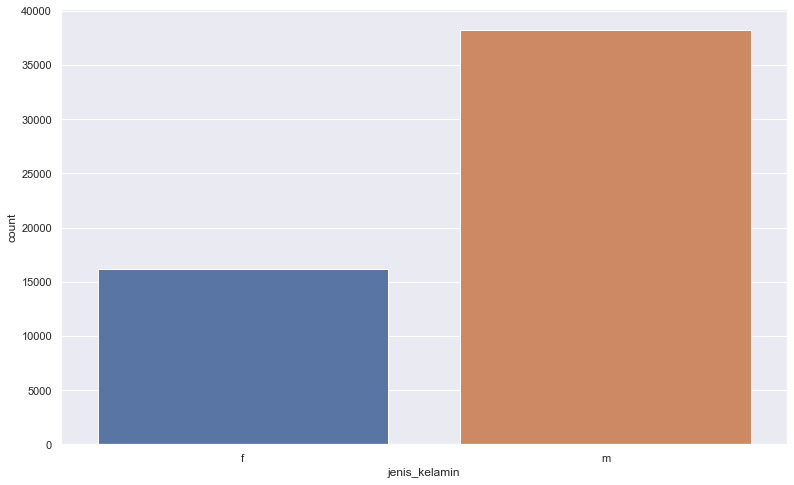

In [36]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='jenis_kelamin',data=df)

#### Terlihat bahwa data didominasi karyawan laki-laki

<Figure size 1440x576 with 0 Axes>

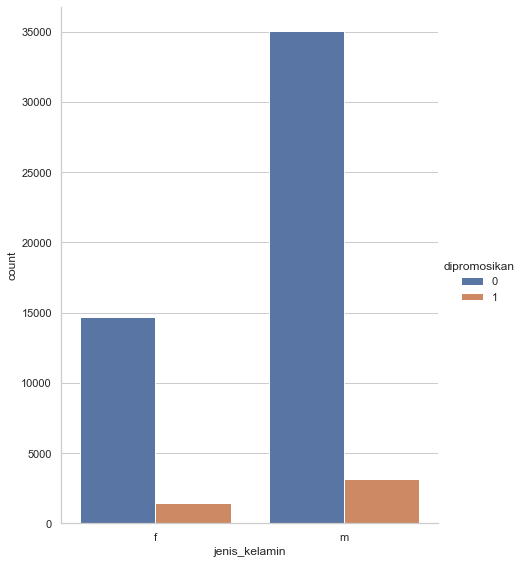

In [37]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='jenis_kelamin',hue='dipromosikan',data=df,kind="count",height=8, aspect=0.8)

#### Terlihat dari grafik di atas bahwa karyawan laki-laki juga lebih banyak dipromosikan (secara jumlah)

### 4.1.4. Fitur Rekrutmen

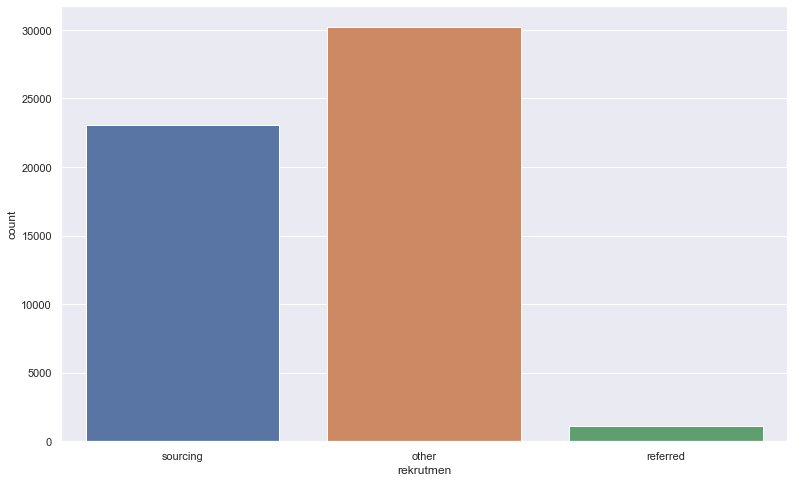

In [38]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='rekrutmen',data=df)

#### Terlihat dari grafik di atas jalur rekrutmen karyawan paling banyak adalah "other" atau tidak dideskripsikan dengan jelas. Posisi kedua terbanyak diduduki oleh "sourcing"

<Figure size 1440x576 with 0 Axes>

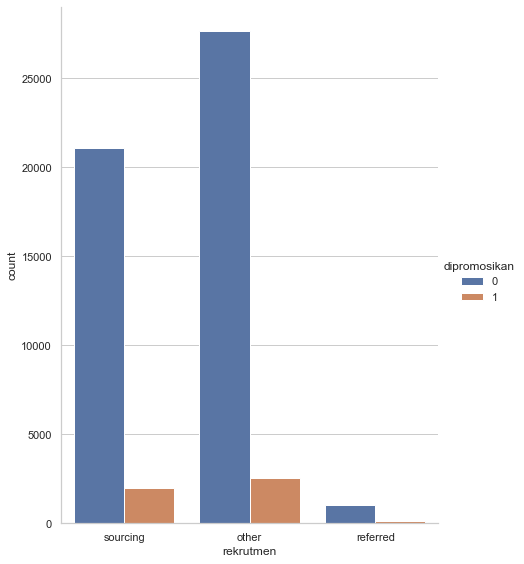

In [39]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='rekrutmen',hue='dipromosikan',data=df,kind="count",height=8, aspect=0.8)

#### Terlihat dari grafik di atas karyawan dengan proses rekrutmen "other" atau tidak dideskripsikan dengan jelas menempati posisi terbanyak dalam urutan dipromosikan. Sedangkan karyawan dengan jalur rekrutmen "referred" hampir tidak ada (sedikit) yang dipromosikan)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54368 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54368 non-null  int64  
 1   departemen               54368 non-null  object 
 2   wilayah                  54368 non-null  object 
 3   pendidikan               54368 non-null  object 
 4   jenis_kelamin            54368 non-null  object 
 5   rekrutmen                54368 non-null  object 
 6   jumlah_training          54368 non-null  int64  
 7   umur                     54368 non-null  int64  
 8   rating_tahun_lalu        54368 non-null  float64
 9   masa_kerja               54368 non-null  int64  
 10  KPI_>80%                 54368 non-null  int64  
 11  penghargaan              54368 non-null  int64  
 12  rata_rata_skor_training  54368 non-null  int64  
 13  dipromosikan             54368 non-null  int64  
dtypes: float64(1), int64(8

### 4.1.5. Fitur Jumlah Training

<Figure size 1440x576 with 0 Axes>

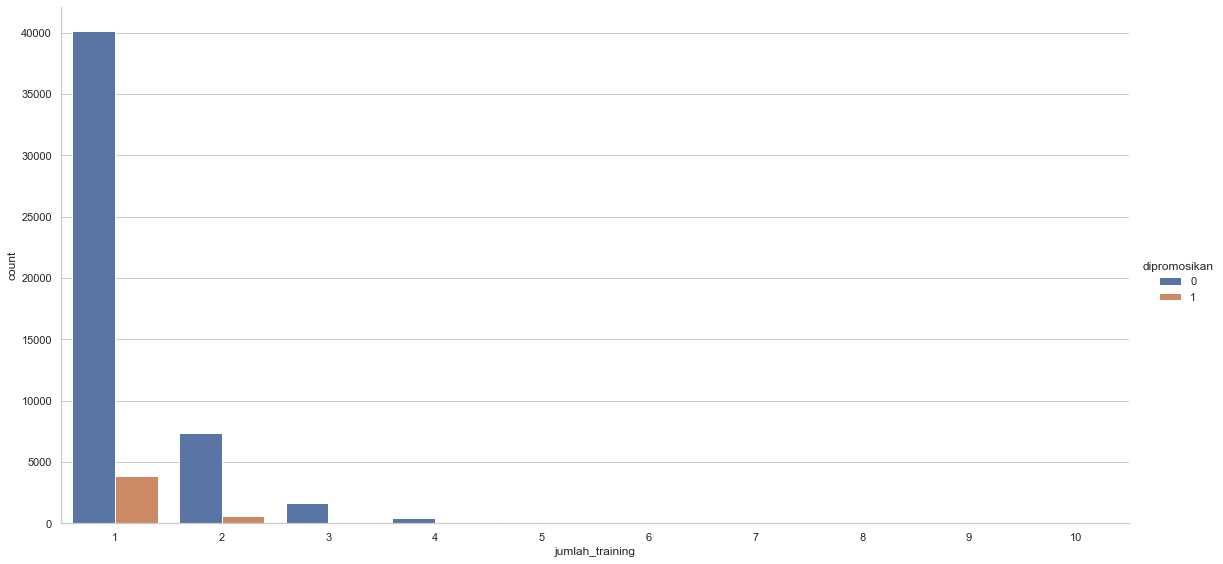

In [41]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='jumlah_training',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### Dapat dilihat dari grafik di atas bahwa karyawan dengan jumlah training paling sedikit (yaitu 1) justru paling banyak yang dipromosikan

### 4.1.6. Fitur Umur

<Figure size 1440x576 with 0 Axes>

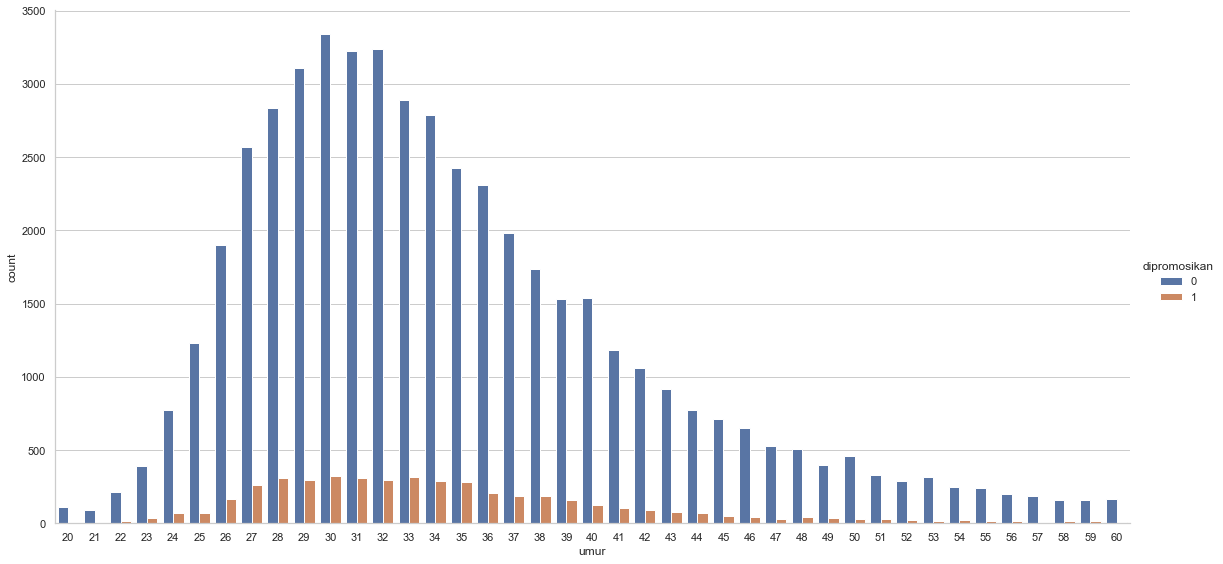

In [42]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='umur',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### Dapat dilihat dari grafik di atas, karyawan berkisar umur 27-35 tahun adalah karyawan yang paling banyak dipromosikan

### 4.1.7. Fitur Rating Tahun Lalu

<Figure size 1440x576 with 0 Axes>

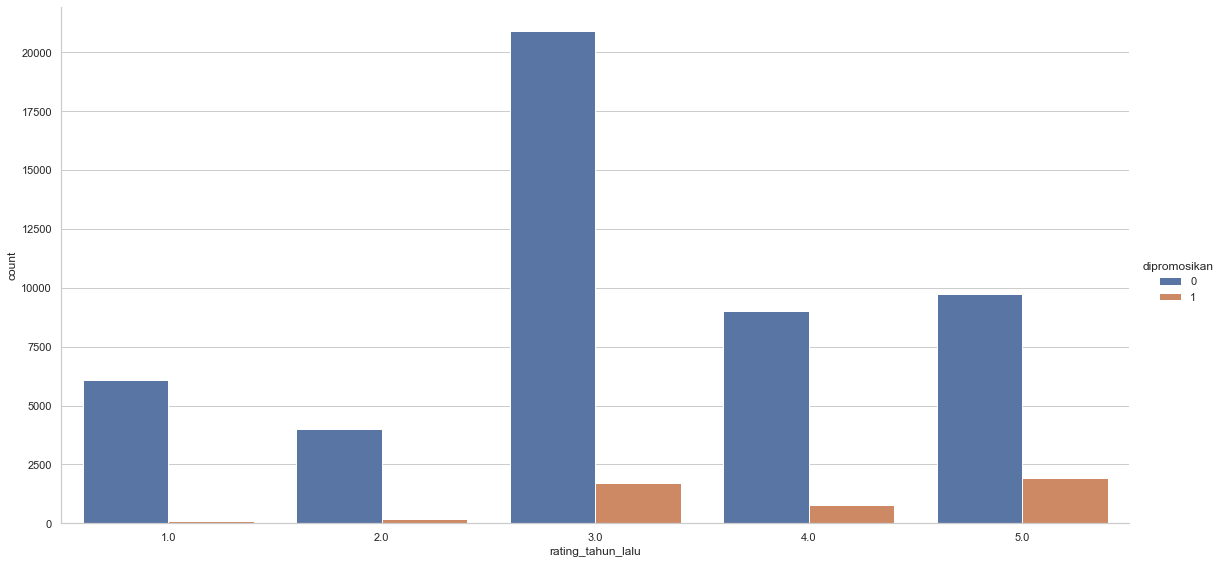

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='rating_tahun_lalu',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### Terlihat dari grafik di atas karyawan dengan rating 5 adalah karyawan yang paling banyak dipromosikan

### 4.1.8. Fitur Masa Kerja

<Figure size 1440x576 with 0 Axes>

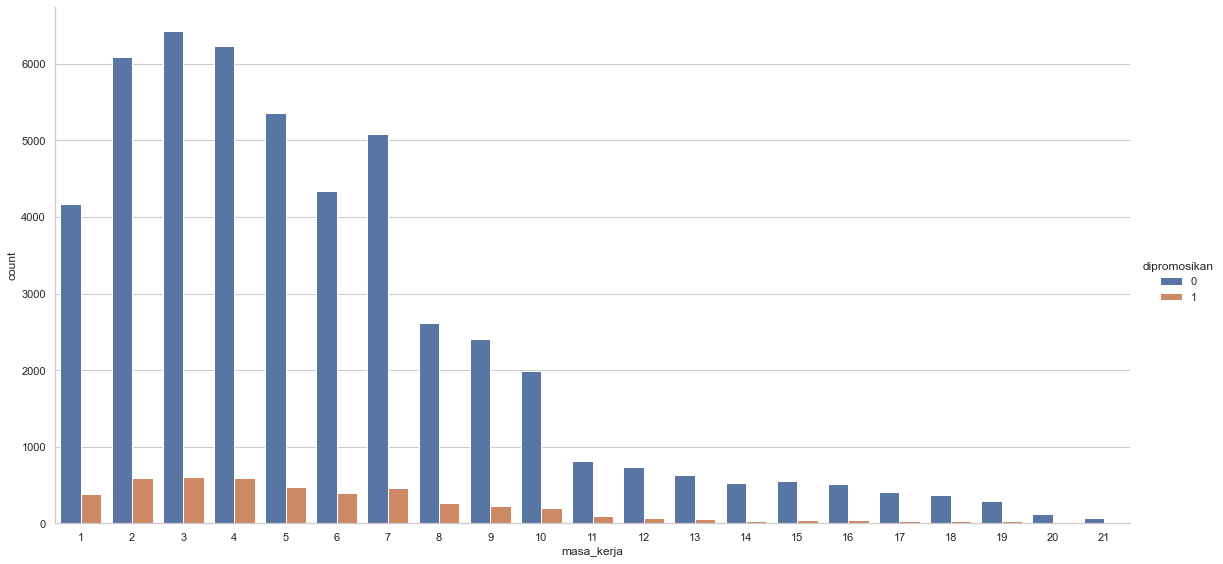

In [44]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='masa_kerja',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### Terlihat dari grafik di atas bahwa karyawan yang masa kerjanya 2-4 tahun adalah karyawan yang paling banyak dipromosikan

### 4.1.9. Fitur Key Performance Index (KPI)

<Figure size 1440x576 with 0 Axes>

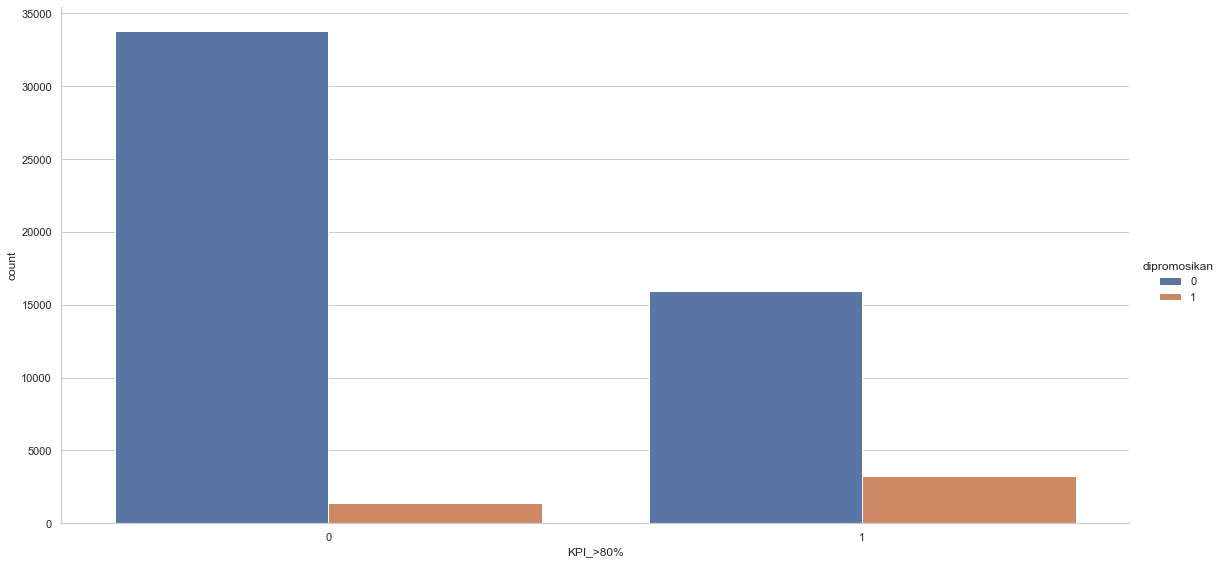

In [45]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='KPI_>80%',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### Terlihat dari grafik, meskipun kebanyakan karyawan mempunyai KPI di bawah 80%, namun karyawan yang paling banyak dipromosikan adalah karyawan yang mempunyai KPI di atas 80%.

### 4.1.10. Fitur Penghargaan

<Figure size 1440x576 with 0 Axes>

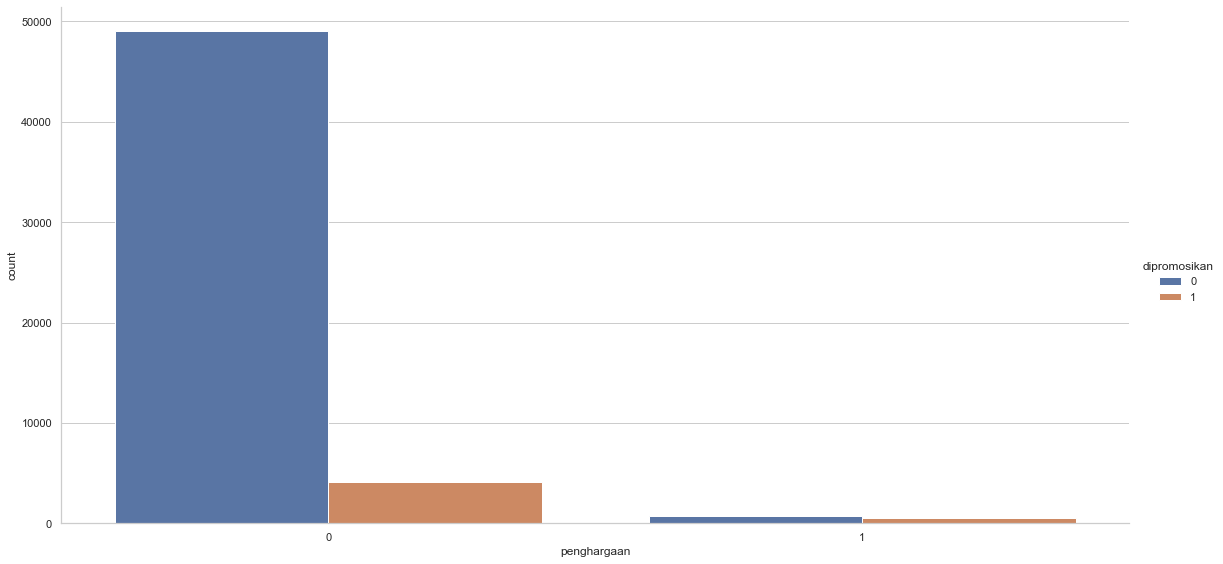

In [46]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='penghargaan',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### Terlihat dari grafik bahwa karyawan yang tidak memiliki penghargaan adalah yang paling banyak dipromosikan. Hal ini juga dikarenakan jumlah karyawan yang tidak memiliki penghargaan jauh lebih banyak dibandingkan dengan karyawan yang memiliki penghargaan.

### 4.1.11. Fitur Rata-rata Skor Training

<Figure size 1440x576 with 0 Axes>

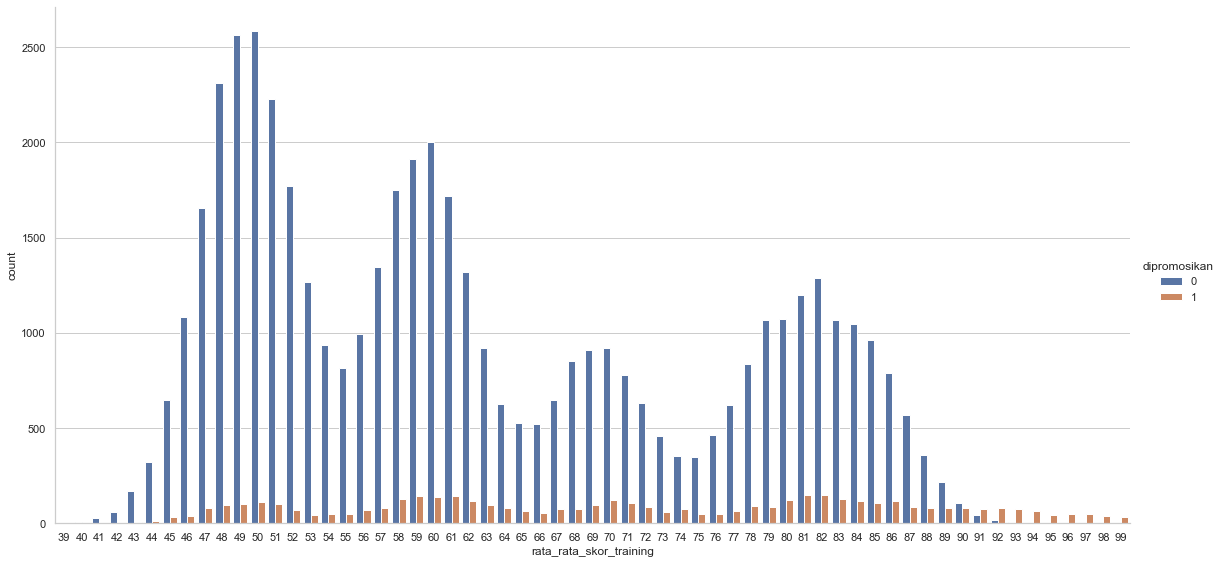

In [47]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='rata_rata_skor_training',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### Terlihat karyawan memiliki rata-rata skor training yang bervariasi. Jumlah karyawan yang dipromosikan berdasarkan rata-rata skor training juga bervariasi, tidak bisa terlalu ditentukan mana skor yang mendominasi. Namun kira-kira karyawan dengan rata-rata skor training di rentang 59-62 dan 80-85 adalah yang paling banyak dipromosikan (meskipun selisihnya mungkin sedikit)

### 4.1.12. Fitur "dipromosikan" sebagai target

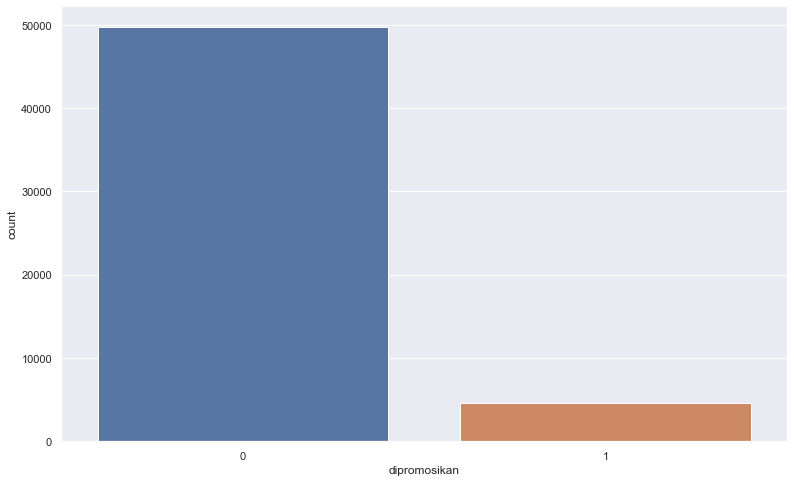

In [48]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='dipromosikan',data=df)

#### Terlihat bahwa data target kita antara yang positif dan negatif tidak seimbang. Data negatif kita lebih banyak.

## 4.2. Korelasi Antar Fitur

#### Saya berpikir awalnya ada hubungan atau korelasi signifikan antara fitur jumlah training karyawan, rating tahun lalu, dan key performance index karyawan. Kita akan cek korelasinya dengan menggunakan korelasi pearson dan memetakannya pada heat map.

                   jumlah_training  rating_tahun_lalu  KPI_>80%
jumlah_training           1.000000          -0.061718 -0.045785
rating_tahun_lalu        -0.061718           1.000000  0.336349
KPI_>80%                 -0.045785           0.336349  1.000000


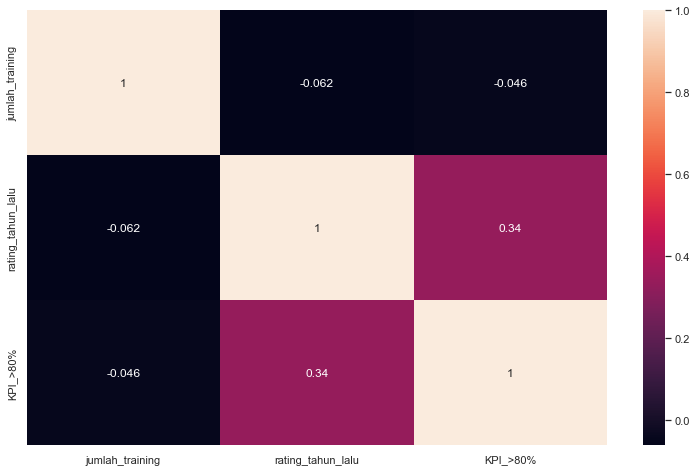

In [49]:
print(df[['jumlah_training','rating_tahun_lalu','KPI_>80%']].corr())
sns.heatmap(df[['jumlah_training','rating_tahun_lalu','KPI_>80%']].corr(), annot=True);

#### Namun ternyata tidak ada korelasi yang signifikan di antara fitur-fitur tersebut sehingga tidak perlu dicek lagi P-Valuenya

#### Sekarang akan dicek korelasi keseluruhan fitur-fitur yang ada dalam data

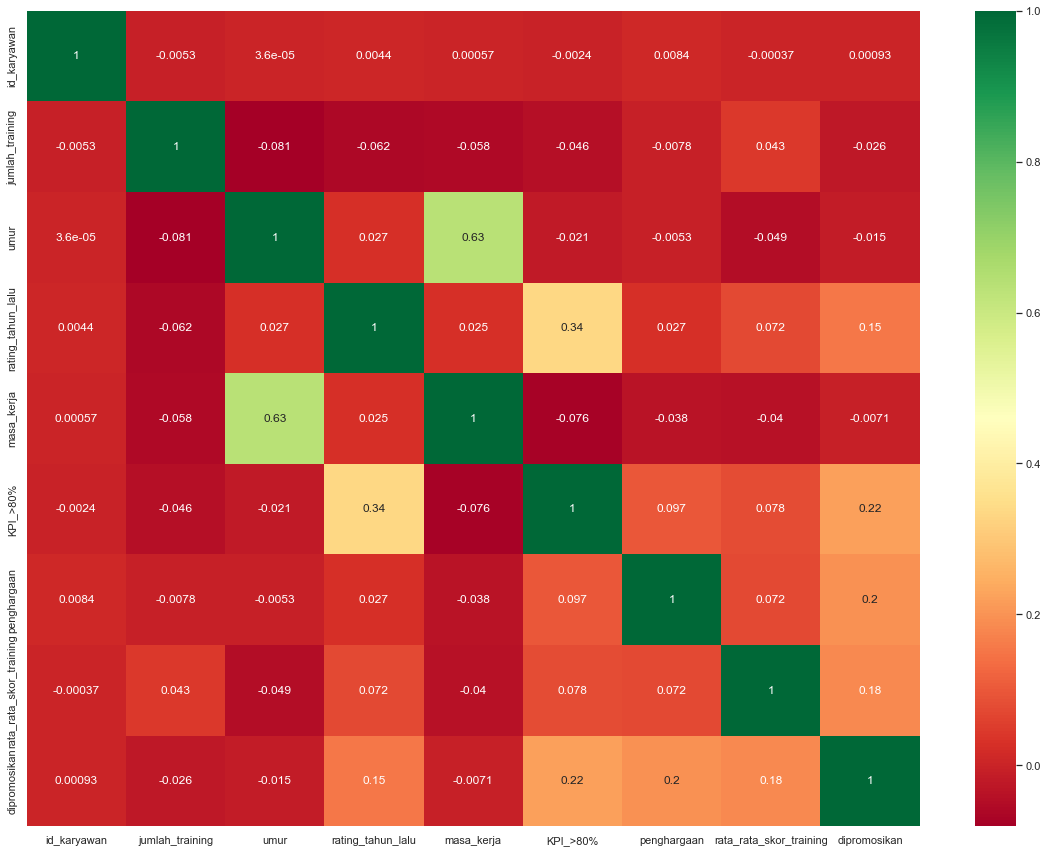

In [50]:
plt.figure(figsize=(20,15))

#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

#### Terlihat tidak ada korelasi yang begitu besar dan berarti dari masing-masing fitur. Juga bisa dicek pairplot dari masing-masing fitur pada data

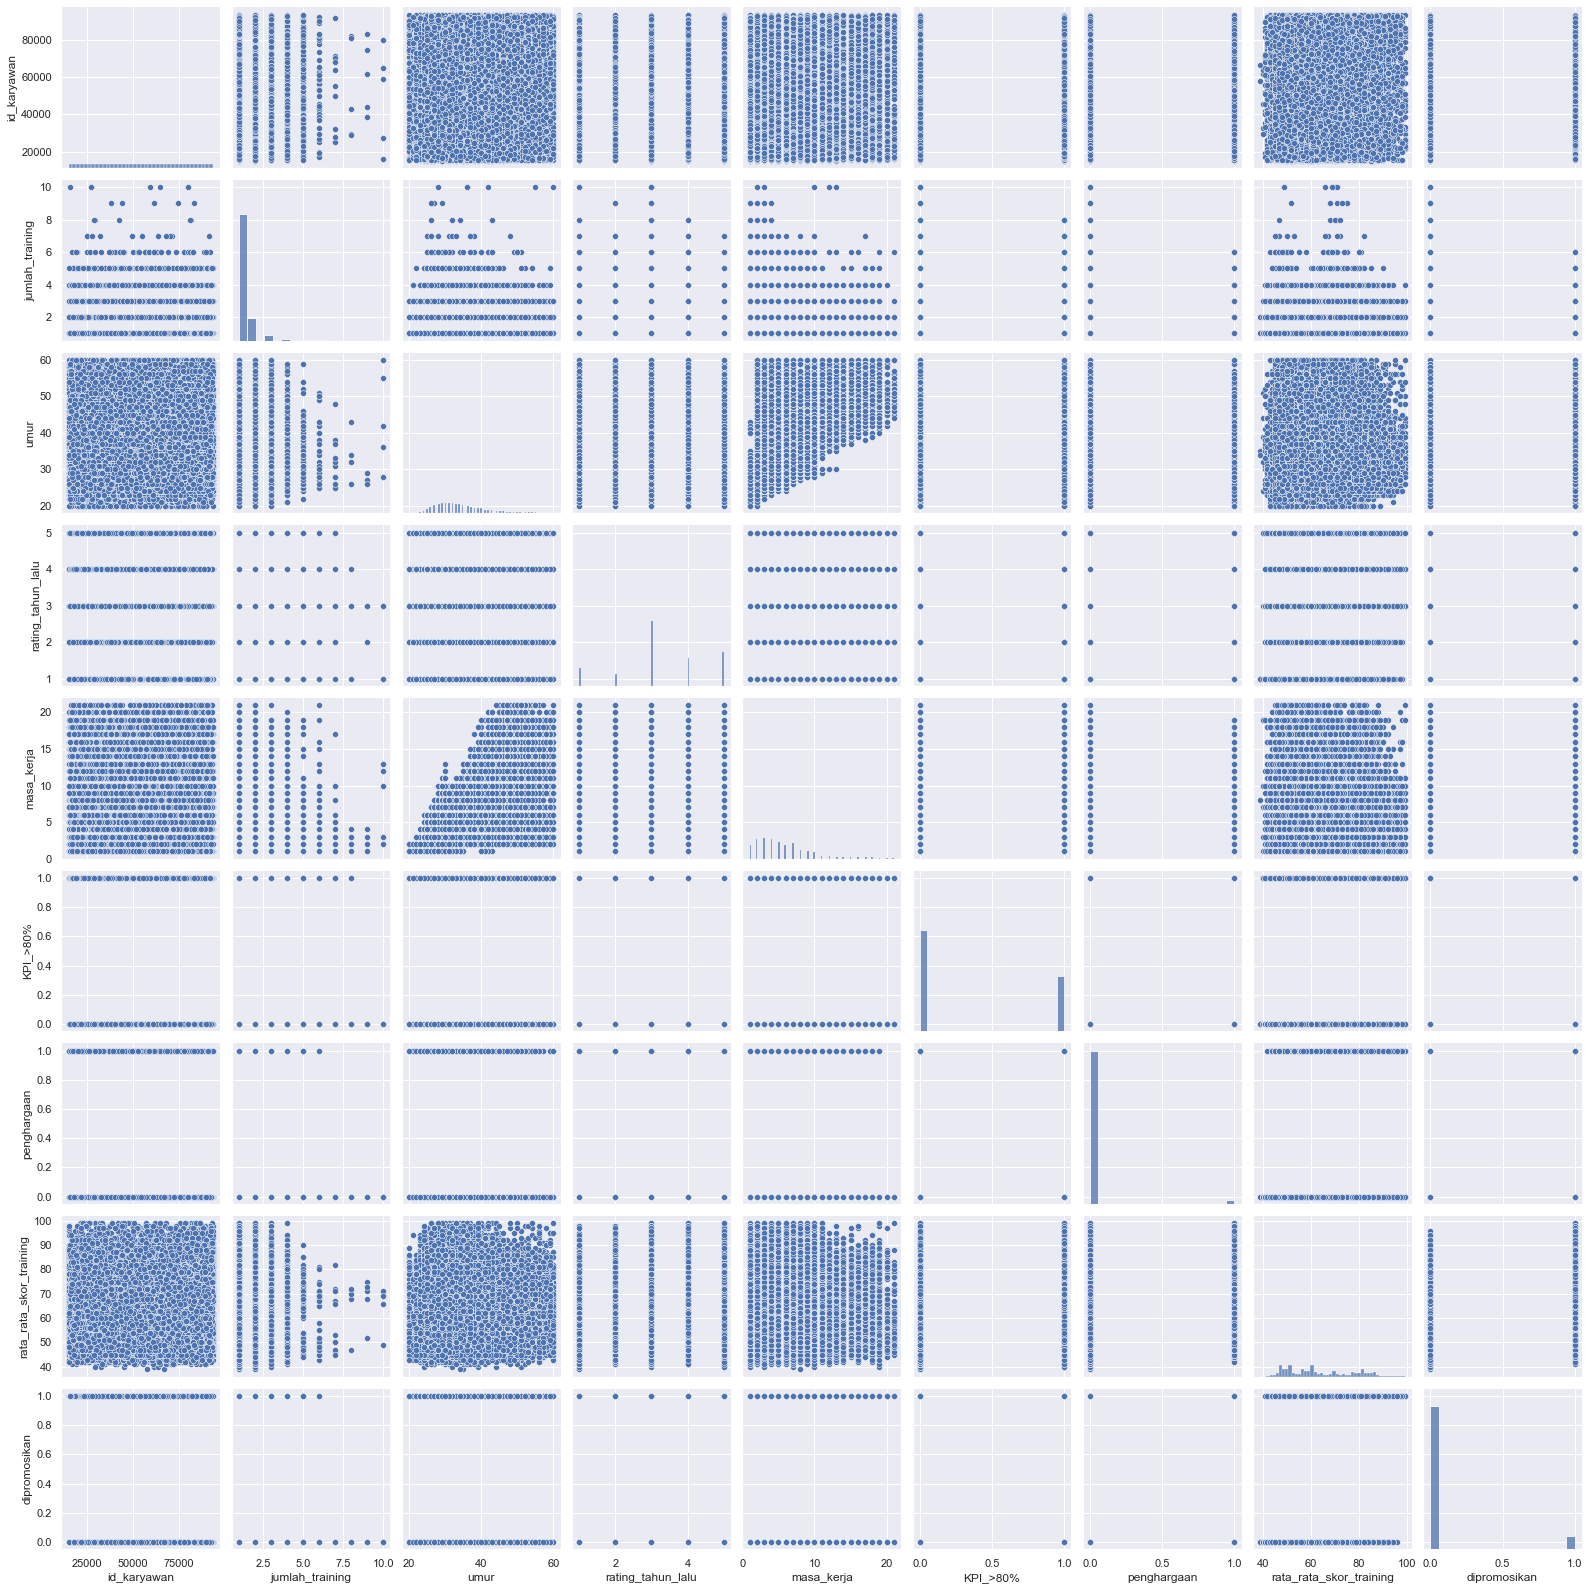

In [51]:
sns.pairplot(df)

## 4.3. Analisis dan Visualisasi Statistik Fitur Pada Data

### 4.3.1. Analisis Rata-rata Key Performance Index terhadap departemen karyawan

In [52]:
fig = px.histogram(df, 'KPI_>80%',             
                   color='departemen',
                   title="<b>Rata-rata Key Performance Index terhadap departemen karyawan</b>")

fig.add_vline(x=df['KPI_>80%'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()



#### Departemen sales & marketing merupakan departemen yang karyawannya paling banyak memiliki KPI lebih dari 80 persen. Terlihat juga lebih banyak karyawan dari setiap departemen yang memiliki KPI kurang dari 80%

### 4.3.2. Analisis Rata-rata Key Performance Index terhadap latar belakang pendidikan karyawan

In [53]:
fig = px.histogram(df, 'KPI_>80%',             
                   color='pendidikan',
                   title="<b>Rata-rata Key Performance Index terhadap latar belakang pendidikan karyawan </b>")

fig.add_vline(x=df['KPI_>80%'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()



#### Karyawan dengan latar belakang pendidikan sarjana paling banyak memiliki KPI lebih dari 80 persen. Rata-rata dari distribusi dapat dilihat pada grafik di atas

### 4.3.3. Analisis Rata-rata masa keja karyawan terhadap departemen karyawan

In [54]:
fig = px.histogram(df, 'masa_kerja',             
                   color='departemen',
                   title="<b>Rata-rata masa keja karyawan terhadap departemen karyawan</b>")

fig.add_vline(x=df['masa_kerja'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

#### Dari grafik terlihat karyawan dari departemen sales & marketing serta operations, serta teknologi adalah urutan karyawan yang memiliki masa kerja antara 1-10 tahun paling banyak di perusahaan. Karyawan yang memiliki masa kerja di atas 10 tahun kebanyakan kira-kira adalah karyawan dari departemen operasi, teknologi dan finance.

### 4.3.4. Analisis Rata-rata skor training terhadap departemen masing-masing karyawan

In [55]:
fig = px.histogram(df, 'rata_rata_skor_training',             
                   color='departemen',
                   title="<b>Rata-rata skor training terhadap departemen masing-masing karyawan</b>")

fig.add_vline(x=df['rata_rata_skor_training'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()


#### Terlihat dari grafik average dari rata-rata skor training karyawan adalah 64 dengan karyawan dari departemen operation dan legal yang paling banyak memiliki rata-rata skor tersebut. Sedangkan untuk rata-rata skor training tertinggi (85-100) kebanyakan dimiliki oleh karyawan dari departemen Analytics dan R&D

### 4.3.5. Analisis Rata-rata skor training terhadap latar belakang pendidikan karyawan

In [56]:
fig = px.histogram(df, 'rata_rata_skor_training',             
                   color='pendidikan',
                   title="<b>Rata-rata skor training terhadap latar belakang pendidikan karyawan</b>")

fig.add_vline(x=df['rata_rata_skor_training'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()
#tes


#### Lalu terakhir karyawan yang memiliki rata-rata skor training tertinggi adalah karyawan yang berlatar belakang pendidikan sarjana

### 4.3.6. Distribusi fitur numerik dan kontinu pada data

#### Berikut ditampilkan boxplot untuk menampilkan distribusi dari data

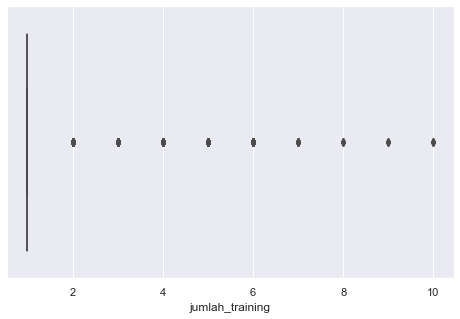

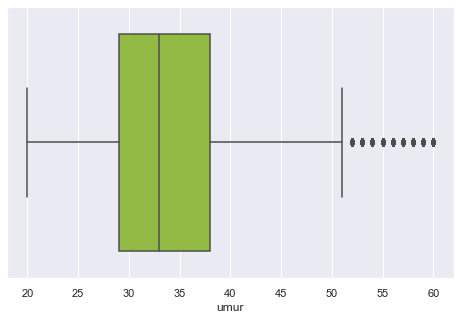

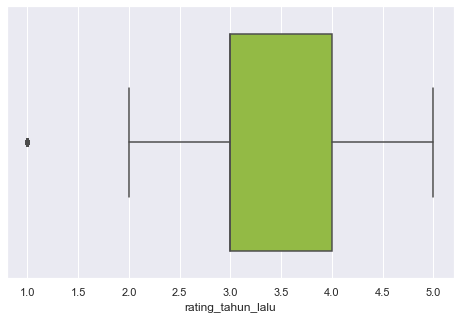

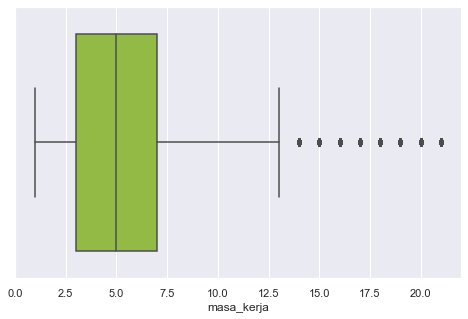

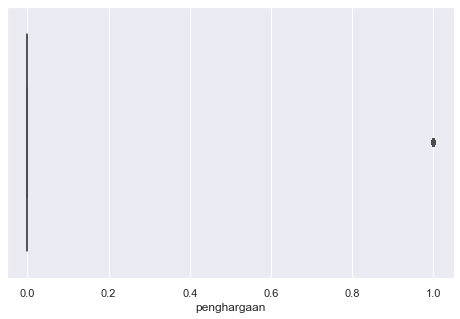

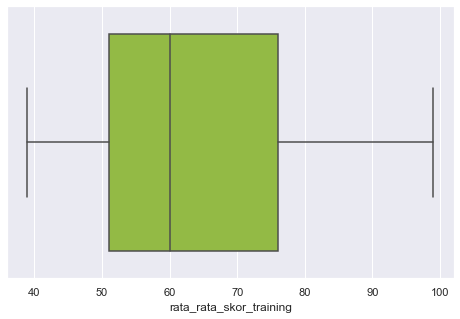

In [57]:
x = df.drop(['id_karyawan','departemen','wilayah','pendidikan','jenis_kelamin','rekrutmen','dipromosikan','KPI_>80%'],axis = 1)
for i in x.columns:
    sns.set(rc = {'figure.figsize':(8,5)})
    sns.boxplot(x = i, data = x,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()

# 5. Pembuatan Model Machine Learning

## 5.1. Preprocessing Data

### 5.1.2. Filter data-data yang dibutuhkan

#### Kolom id_karyawan dan wilayah karyawan bekerja dibuang karena dirasa tidak relevan terhadap promosi karyawan.

In [58]:
df = df.drop(["id_karyawan","wilayah"],axis=1)
df.head()

departemen        pendidikan jenis_kelamin rekrutmen  \
0  Sales & Marketing  Master's & above             f  sourcing   
1         Operations        Bachelor's             m     other   
2  Sales & Marketing        Bachelor's             m  sourcing   
3  Sales & Marketing        Bachelor's             m     other   
4         Technology        Bachelor's             m     other   

   jumlah_training  umur  rating_tahun_lalu  masa_kerja  KPI_>80%  \
0                1    35                5.0           8         1   
1                1    30                5.0           4         0   
2                1    34                3.0           7         0   
3                2    39                1.0          10         0   
4                1    45                3.0           2         0   

   penghargaan  rata_rata_skor_training  dipromosikan  
0            0                       49             0  
1            0                       60             0  
2            0                       50             0  
3            0                       50             0  
4            0                       73             0

### 5.1.3. Encoding data-data kategorikal

#### Ada beberapa teknik encoding, di antaranya yaitu one-hot encoding dan label encoding. Di sini saya menggunakan one-hot encoding.

In [ ]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [ ]:
df_onehot=df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)

In [ ]:
df_onehot.head()

In [ ]:
df_onehot.info()

## 5.2. Pembagian data menjadi data training dan test

In [ ]:
scaler = StandardScaler()
X = df_onehot.drop("dipromosikan",axis=1)
y = df_onehot["dipromosikan"]

#### train size dan test size dibagi menjadi proporsi (60:40). Proporsi lain telah saya coba gunakan dan terakhir saya menggunakan proporsi ini.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)

#### Dilakukan scaling pada data

In [ ]:
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 5.3. Model Machine Learning

### 5.3.1. Model K-Nearest Neighbor (KNN)

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

In [ ]:
pred_knn = model_knn.predict(X_test)
print(classification_report(y_test,pred_knn))

In [ ]:
cmat = confusion_matrix(y_test,pred_knn)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

### 5.3.2. Model Naive Bayes

In [ ]:
model_gaussian = GaussianNB()
model_gaussian.fit(X_train,y_train)

In [ ]:
pred_gauss = model_gaussian.predict(X_test)
print(classification_report(y_test,pred_gauss))

In [ ]:
cmat = confusion_matrix(y_test,pred_gauss)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

### 5.3.3. Model Logistic Regression

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

In [ ]:
pred_LR = model_LR.predict(X_test)
print(classification_report(y_test,pred_LR))

In [ ]:
cmat = confusion_matrix(y_test,pred_LR)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

### 5.3.4. Model Random Forest

In [ ]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

In [ ]:
pred_forest = model_forest.predict(X_test)
print(classification_report(y_test,pred_forest))

In [ ]:
cmat = confusion_matrix(y_test,pred_forest)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

### 5.3.5. Model Ensemble (XGBoost)

In [ ]:
model_xgbm = XGBClassifier()
model_xgbm.fit(X_train, y_train)

In [ ]:
pred_xgbm = model_xgbm.predict(X_test)
print(classification_report(y_test,pred_xgbm))

In [ ]:
cmat = confusion_matrix(y_test,pred_xgbm)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

### 5.3.6. Model Ensemble (LGBM)

In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)

In [ ]:
pred_lgbm = model_lgbm.predict(X_test)
print(classification_report(y_test,pred_lgbm))

In [ ]:
cmat = confusion_matrix(y_test,pred_lgbm)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

#### Seperti yang telah dicantumkan pada bagian visualisasi target yang kita miliki ("dipromosikan") jumlahnya tidak seimbang antara kelas positif dan negatif. Oleh karena itu kita tidak boleh bergantung hanya pada metrik akurasi saja, namun kita juga perlu melihat metrik presisi, recall, dan yang paling utama adalah F1-Score yang menggabungkan keduanya.

#### Terlihat semua model menghasilkan akurasi yang cukup tinggi (hampir semua di atas 90%), namun kita perlu memilih model berdasarkan F1-Score nya juga. Dari ke enam model yang dibuat diperoleh F1-Score yang paling tinggi dihasilkan oleh model XGBoost dan LGBM yaitu sekitar 73%. Namun karena model LGBM menghasilkan akurasi yang lebih tinggi, maka model LGBM lah yang dipilih sebagai model optimal dari beberapa model yang dibuat.

# 6. Saran untuk deployment dan life cycle model

#### Tentunya model yang telah dibuat akan dideploy. Namun perlu diperhatikan beberapa hal, di antaranya adalah konteks data yang akan dihadapi oleh model. Model dibuat untuk konteks data tertentu dan data yang sudah rapi, oleh karena itu model ini tidak boleh dideploy mentah-mentah, namun perlu ditambahkan Fitur untuk memproses data-data yang masuk secara otomatis. Kita harus terus memahami konteks permasalahan data sebelum model digunakan. Keberjalanan model perlu dijaga dan dimonitor terus menerus untuk menghindari kegagalan model bekerja. 

#### Perbedaan statistikal dan distrbusi dari data-data yang akan diuji dan dihadapi model juga harus terus diperhatikan. Selain itu kesalahan engineering dalam menerapkan sistem pada deployment model juga perlu dihindari dan diawasi. Lalu yang terakhir, model harus terus menerus diupdate jika dirasa perlu adanya perubahan, baik versi atau fungsionalitasnya. 